## Analysis of the Concrete Slump Test data set

**Author:** Leonardo Espin

**Date:** July 3, 2019

* First I will load all the libraries I will use for the exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 20)
#the lines below get rid of the plotting library warnings
import warnings
warnings.filterwarnings("ignore")

* Next I will get the data from the online repository, and print the size of the dataset and the first few lines of data

In [2]:
#get data from online repository
url ="https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data"
raw = pd.read_csv(url)
print(raw.shape)
raw.head(10)

(103, 11)


,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
5,6,147.0,89.0,115.0,202.0,9.0,860.0,829.0,23.0,55.0,25.21
6,7,152.0,139.0,178.0,168.0,18.0,944.0,695.0,0.0,20.0,38.86
7,8,145.0,0.0,227.0,240.0,6.0,750.0,853.0,14.5,58.5,36.59
8,9,152.0,0.0,237.0,204.0,6.0,785.0,892.0,15.5,51.0,32.71
9,10,304.0,0.0,140.0,214.0,6.0,895.0,722.0,19.0,51.0,38.46


* Below I check the data types of the varibles, and if there are any missing data

In [3]:
#checking the data types of the variables
raw.dtypes

No                                      int64
Cement                                float64
Slag                                  float64
Fly ash                               float64
Water                                 float64
SP                                    float64
Coarse Aggr.                          float64
Fine Aggr.                            float64
SLUMP(cm)                             float64
FLOW(cm)                              float64
Compressive Strength (28-day)(Mpa)    float64
dtype: object

In [4]:
#checking missing data for each column
raw.isnull().sum()

No                                    0
Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

From the data description, the first 7 variables are input and the last 3 output. So, the variable 'No' is just an index, and because of that I will drop it. Afterwards I print the first rows of the data to confirm the deletion

In [5]:
#checking that this is indeed the case before dropping
print('if this value: {} equals 103, the variable \'No\' will be dropped'
      .format(sum(raw
                  .No
                  .apply(lambda x:x-1)==raw.No.index)))

if this value: 103 equals 103, the variable 'No' will be dropped


In [6]:
raw.drop(columns='No',inplace=True)
raw.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


* Now I will calculate basic descriptive statistics of the data

In [7]:
#descriptive statistics for the data
raw.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


from the basic statistics computed above, it does not seem that there are salient problems with data. Importantly all the measured input and output quantities seem reasonable:
1. all weights are positive
2. all output variables are positive
3. there are not large outliers in any of the variables
4. all the measured weights in the input variables **seem physical**, *compared with the weight of a cubic meter of water (1000 kg), which is a reasonable benchmark*


* Next, since all the variable are continous I will plot histograms to check the distribution of the data

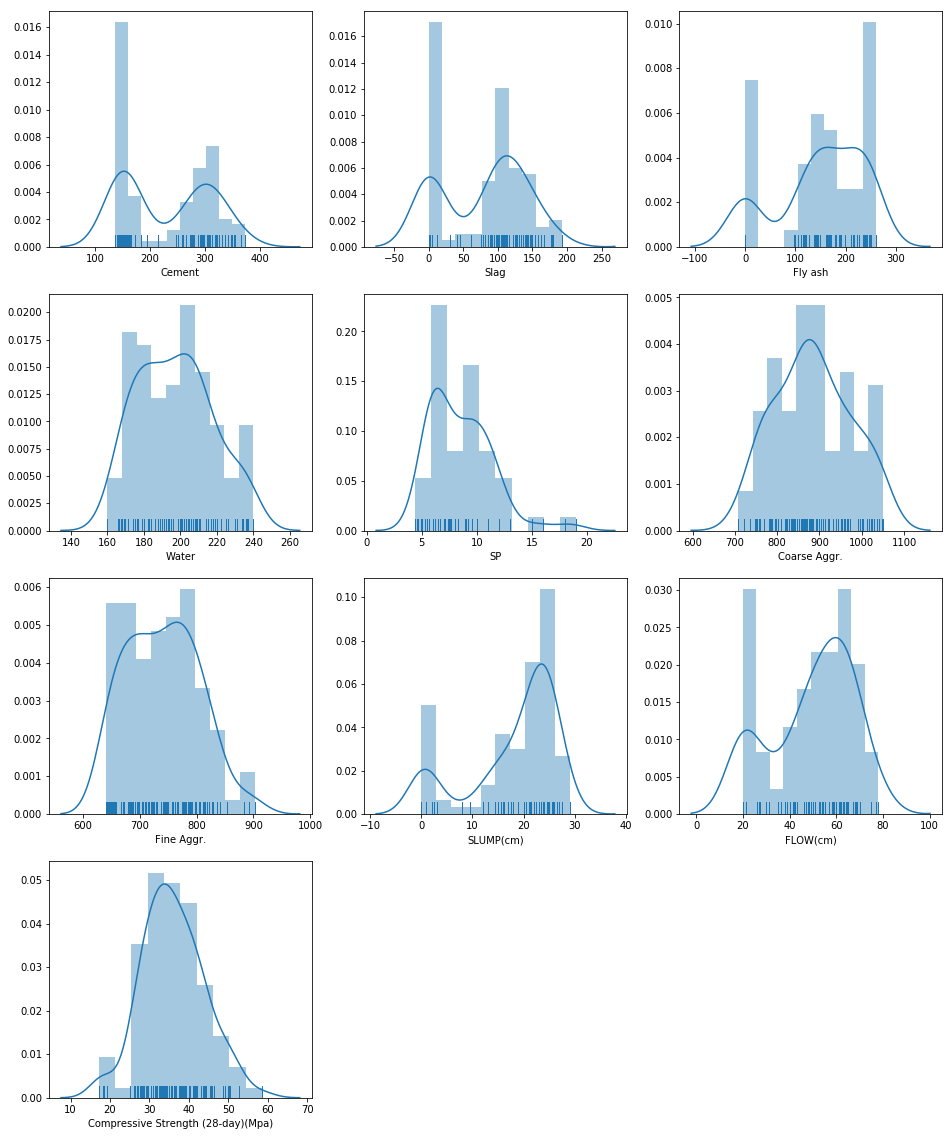

In [8]:
plt.figure(figsize=(16,20))
nbins=10 #play with this to improve visualizations
for i in range(len(raw.columns)):
    plt.subplot(4, 3, i+1)
    sns.distplot(raw[raw.columns[i]],bins=nbins,kde=True,rug=True)
    #since data is small, I plot a density estimate and data ticks above

A few observations:
* *Cement*: there are very few measurements in an interval around 200 kg. 
* *Slag*: there are very few measurements below ~75kg (they seem like outliers)
* *Fly ash*: very few measurements below 100kg (they seem a bit odd. *Could they be bad measurements?*)
* *Water*: this variable seems unremarkable
* *SP*: few measurements above 10kg
* *Coarse agg.* : this variable seems well distributed
* *Fine agg.* : this variable seems well distributed below ~850kg, very few measurements above this value

Output variables:

* *Slump*: few values below 15cm. Of these values below 15, a smaller group accumulates around 0 (my guess is that the less slump is the better). Values above 15 seem to be normally distributed
* *Flow*: there is a bit of measurements accumulation around 20cm  (desirable, probably). Above 30cm they seem normally distributed
* *Compressive strength*: there are few values below ~25 Mpa (low compressive strength is bad). This is the output variable with a distribution that resembles normality the most.

Because of the observations above, below I inspect more closely the zero values for the'fly ash' and 'slag' variables

In [9]:
#check how many 'fly ash' and 'slag' values are zero:
print('Fly ash = 0: {}'.format(sum(raw['Fly ash']==0)))
print('Slag = 0: {}'.format(sum(raw['Slag']==0)))

Fly ash = 0: 20
Slag = 0: 26


It almost seems that these 0 'fly ash' and 'slag' measurements are missing values that were filled with zeroes. It could also be that these measurements were below the sensitivity threshold for the measurement method used. Nevertheless, This is something to keep in mind. 

* Next I will create plots to visualize the correlation between the CS and the seven input variables. Since all the variables are continuous I will show regular scatter plots, next to *inverted plots with a stratified CS variable*. By inverted I mean that I swap the x and y axis of the regular scatter plot in order to use the `x_bins` functionality of the seaborn package
* Note that *the relationships between variables are maintained when I swap x and y axis in the visualizations below*, meaning that for given variables x and y, if y increases when x increases, this will be also shown when I swap the axes. 

In [10]:
#creating lists with input and output variables
variables=list(raw.columns)
inputV=variables[0:7]
outputV=variables[7:]

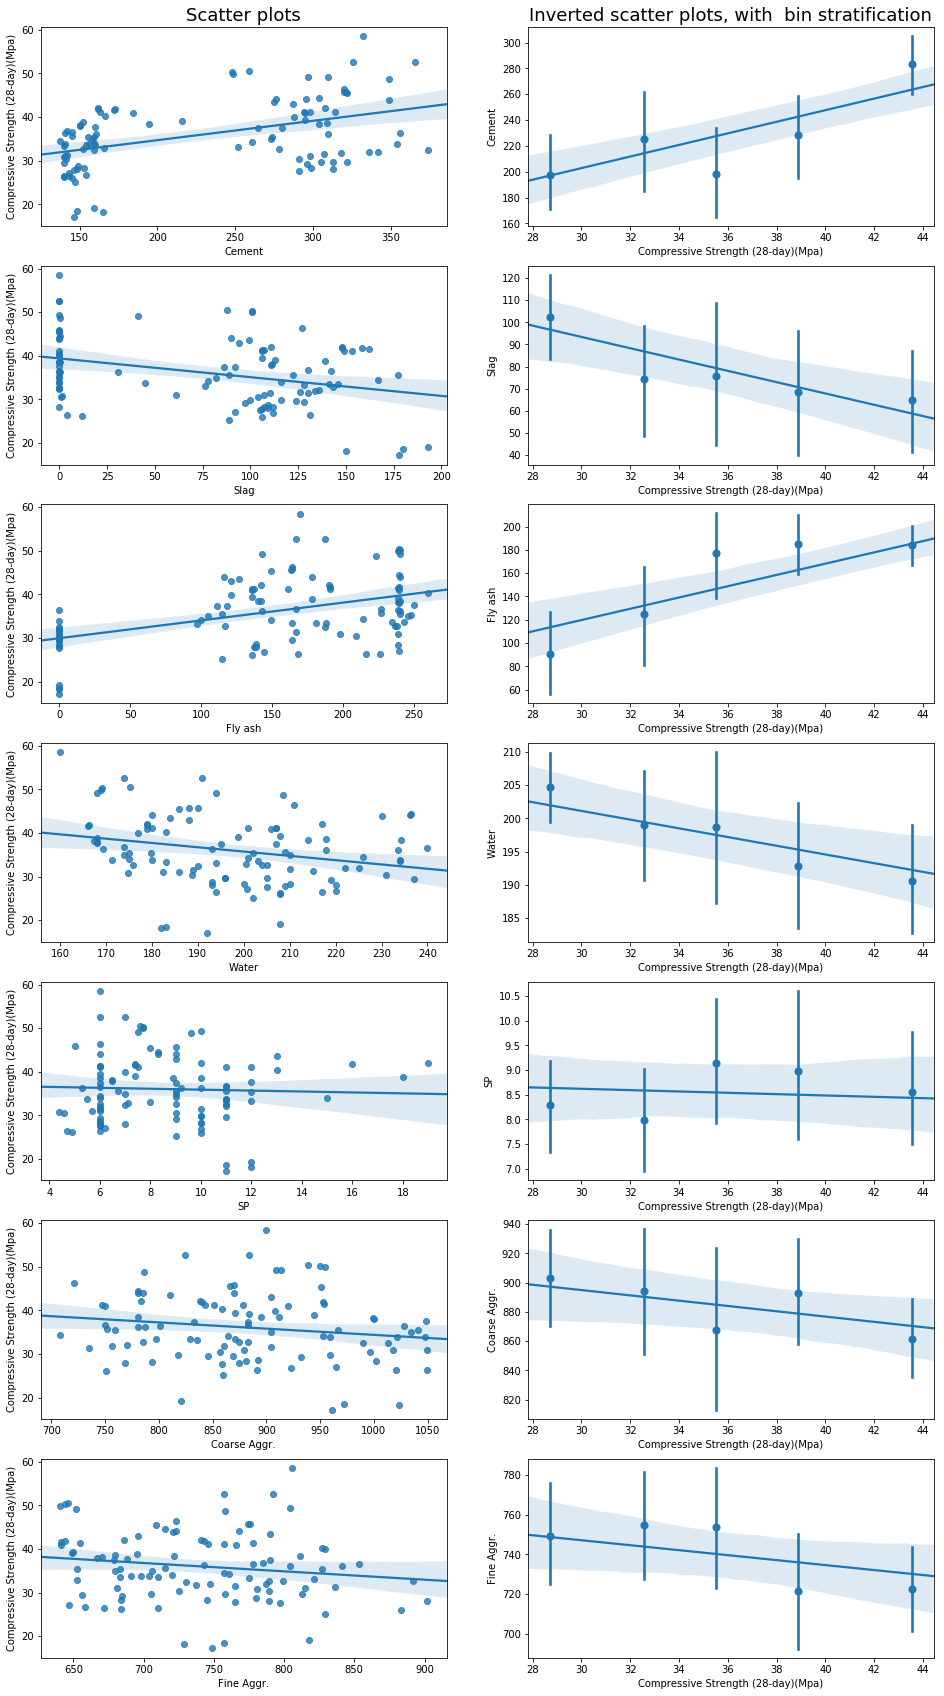

In [11]:
plt.figure(figsize=(16,30))
nbins=5 #play with this to improve visualizations
total=len(inputV)
j=0
for i in range(total):
    tmp_df=raw[[inputV[i],outputV[-1]]]
    plt.subplot(total, 2, (2*i)+1)
    sns.regplot(x=tmp_df[inputV[i]],y=tmp_df[outputV[-1]],data=tmp_df)
    if j==0:
        plt.title('Scatter plots', fontsize=18);
    plt.subplot(total, 2, 2*(i+1))
    sns.regplot(x=tmp_df[outputV[-1]],y=tmp_df[inputV[i]],data=tmp_df, x_bins=nbins)
    if j==0:
        plt.title('Inverted scatter plots, with  bin stratification', fontsize=18);
        j+=1

This set of plots is very interesting, because it allows to understand how the input variables affect the measured compressive strength. 

Take for instance the water content (4th variable). It shows an inverse effect between water content in concrete and its compressive strength, meaning that *the more water content, the less compressive strength in the concrete*, which seems reasonable (note that cement content has the opposite effect: the more cement, the more compressive strength in the concrete). 

Although none of the input variables show a large correlation with CS, from the scatter-plot visualizations it seems that the most predictive variables for CS are cement and water content (1st and 4th input variables), given that they show more or less clear trends. 

To find the input variables which more strongly correlate with CS, I calculate the $R^2$ coefficient for the regressions in all the scatter plots above:

In [12]:
from sklearn.linear_model import LinearRegression
linear= LinearRegression()
for i in range(total):
    x=raw[inputV[i]].values.reshape(len(raw),1)#linear regression model expects a 2D matrix
    y=raw[outputV[-1]].values.reshape(len(raw),1)#linear regression model expects a 2D matrix
    linear.fit(x,y,1)
    print('Variable \'' +inputV[i]+ '\' R^2={:.2f}'.format(linear.score(x, y)))

Variable 'Cement' R^2=0.20
Variable 'Slag' R^2=0.11
Variable 'Fly ash' R^2=0.20
Variable 'Water' R^2=0.06
Variable 'SP' R^2=0.00
Variable 'Coarse Aggr.' R^2=0.03
Variable 'Fine Aggr.' R^2=0.02


As I noted above, when I plotted the histograms for the variables, the values of zero for 'fly ash' and 'slag' seem suspicious. The scatter plots for those two variables show that although there is a group of zero measurements for 'slag', there is no *jump* or *gap* between the zeroes and larger values. This is not the case for 'fly ash', where there is a clear gap, with no measurements between 0 and 100kg, which is abnormal. 

Below I repeat the calculation of the $R^2$ coefficient for 'fly ash' and 'slag', when I ignore values of zero.

In [13]:
noZeroes=raw.loc[raw[inputV[2]]>0,[inputV[2],outputV[-1]]]
x=noZeroes[inputV[2]].values.reshape(len(noZeroes),1) 
y=noZeroes[outputV[-1]].values.reshape(len(noZeroes),1) 
linear.fit(x,y,1)
print('Variable \'' +inputV[2]+ '\' R^2={:.2f}'.format(linear.score(x, y)))

Variable 'Fly ash' R^2=0.00


In [14]:
noZeroes=raw.loc[raw[inputV[1]]>0,[inputV[1],outputV[-1]]]
x=noZeroes[inputV[1]].values.reshape(len(noZeroes),1) 
y=noZeroes[outputV[-1]].values.reshape(len(noZeroes),1) 
linear.fit(x,y,1)
print('Variable \'' +inputV[1]+ '\' R^2={:.2f}'.format(linear.score(x, y)))

Variable 'Slag' R^2=0.03


Therefore there is no observable trend between 'fly ash' and CS, when we ignore the zero values. 

* We conclude that **the most predictive variables for CS are** cement, water content, and slag (this last one because of the uncertainty with respect of the 0 measurements)

* Next I construct a decision tree model for the variable CS, using cement and water content as predictors:

### Predicting CS
1. Fist I will partition my data between train and test portions.
2. This train/test (70%/30%) partitioned data will be used in the creation and test of the tree and random forest regressors

In [15]:
from sklearn.model_selection import train_test_split
seed=491
X=raw[[inputV[0],inputV[3]]]
Y=raw[outputV[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

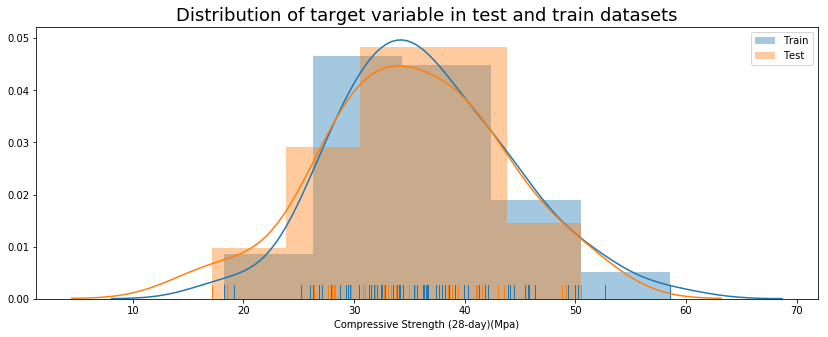

In [16]:
#checking the distribution of the CS variable in train and test sets:
plt.figure(figsize=(14,5))
sns.distplot(y_train,bins=nbins,kde=True,rug=True,label='Train')
sns.distplot(y_test,bins=nbins,kde=True,rug=True,label='Test')
plt.title('Distribution of target variable in test and train datasets', fontsize=18);
plt.legend();

* Below I create a default, benchmark tree, which will tend to overfit the data. From this tree I will get the maximum tree depth, which I will use to select the *optimal tree depth*, using cross-validation
* For cross-validation, I will use K-folds with three folds, since the dataset is very small. 

In [17]:
from sklearn import tree
CStree = tree.DecisionTreeRegressor(random_state=seed)
CStree.fit(X_train,y_train)
print('Maximum depth = {}'.format(CStree.tree_.max_depth))
print('Default R^2 score = {:.3f}'.format(CStree.score(X_train,y_train)))

Maximum depth = 13
Default R^2 score = 1.000


In [18]:
from sklearn import model_selection #for KFold, GridSearchCV
myCV = model_selection.KFold(n_splits=3,random_state=seed)
param_test = {
    'max_depth':[_ for _ in range(2,13)]}
dptSearch = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeRegressor(random_state=seed),                     
    param_grid = param_test, scoring='neg_mean_squared_error',n_jobs=4,
    iid=False, cv=myCV,return_train_score=True)

dptSearch.fit(X_train,y_train)
dptSearch.best_params_, dptSearch.best_score_

({'max_depth': 2}, -46.52095277477333)

* Below I fit a decision tree with the optimal depth that we selected with cross validation in the previous step
* Afterwards I compute the *root mean square error* using the optimal tree
* Then, I generate a visualization of this fitted decision tree

In [19]:
from sklearn.metrics import mean_squared_error
#the decision tree with optimal depth:
optTree = tree.DecisionTreeRegressor(max_depth=2,random_state=seed)
optTree.fit(X_train,y_train)
y_pred = optTree.predict(X_test)
print('RMSE for the test dataset is {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE for the test dataset is 6.48


In [21]:
import graphviz 
dot_data =tree.export_graphviz(optTree, out_file=None)
graph = graphviz.Source(dot_data) 
graph.format='png'
graph.render('output');

![](output.png)

The tree visualization above shows the decisions that the model makes according to the values of the input variables. For example, if we have measured the two variables that are the input in this model `x[0],x[1]` (the cement and water content), and we pass these values to the model, at the top of the tree if the variable `x[0]` is less or equal than 165.65kg, the tree takes one path, but if it is larger than 165.5kg, it takes the other path and so on, according to the criteria shown in the boxes of the visualization. 

When the model reaches the bottom by using this decision process, we say that we have reached a 'leaf', and the model returns a value based on the values of the training variables that were classified in that leaf (this could be the average or by fitting a regression, depending on the implementation of the software package used). This is how the model predicts an output value for CS

* The **test error** is the error that results when predictions of my model are compared with the actual measurements of CS in the test set.
* To find the ideal **maximum depth** for my model I compared trees using different values of the `maximum_depth` parameter, and then I chose the one that gave the best score. 
* To calculate a **accuracy score** for a model, I used cross validation, and a metric to compare the error between predictions and measured values while using the different parameters. Cross validation means that I partitioned the train data in three portions. I train a given tree using two portions, and then I use the last portion to check how accurate is that tree.

### Random forest model

In [22]:
#repeat the train/test split while using all the seven variables this time
X=raw[inputV]
Y=raw[outputV[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

* Below I choose which input variables to use in the random forest model by comparing how important are this seven variables in multiple random forest models

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel #for selecting features for the model
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [24]:
selected=[inputV[i] for i in range(7) if sel.get_support()[i]]
print('The selected variables for my random forest model are: ')
for _ in selected:
    print(_)

The selected variables for my random forest model are: 
Cement
Fly ash
Water


In [25]:
#repeat the train/test split while using the selected variables
X=raw[[inputV[0],inputV[2],inputV[3]]]
Y=raw[outputV[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

* Similar to what I did previously, I use cross-validation to find an optimal value for the number of trees used in the random forest model

In [26]:
param_test2 = {
    'n_estimators':[_ for _ in range(2,30)]}
forestSearch = model_selection.GridSearchCV(
    estimator=RandomForestRegressor(random_state=seed),                     
    param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4,
    iid=False, cv=myCV,return_train_score=True)

forestSearch.fit(X_train,y_train)
forestSearch.best_params_, forestSearch.best_score_

({'n_estimators': 23}, -16.92109774994749)

* Now I calculate the error (RMSE) when I compare predictions from my random forest model with measurements

In [28]:
#forest with the optimal number of trees
forest_model=RandomForestRegressor(n_estimators=23,random_state=seed)
forest_model.fit(X_train,y_train)
y_pred = forest_model.predict(X_test)
print('RMSE for the test dataset is {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE for the test dataset is 2.97


### Final observations
* Note that the error is lower than the one obtained with a single tree model
* Also note that the errors for both models are pretty small compared with the average compressive strength, which is 36.04 Mpa
* Since my random forest model has 23 trees, it is very difficult to think of an effective way to visualize the model
* Other prediction methods could be implemented: gradient boosting, svm or even neural-network methods, however I do not think that would be beneficial, given the small size of this data set, and given that we can learn a lot from the data set, just by doing EDA. Notice that the features selected using the `feature_selection` module were the same ones I highlighted during the EDA portion of this document
* As I described above, the 'fly ash' variable might have some problems. Rather than using more complex models, it might be more beneficial to find out how this variable was measured, to make sure that the predictions made with this variable are not distorted by missing data reported as zero
* I think that concrete is used for its resilience and durability. Because of that it might be beneficial to take measures that minimize slump and increase compressive strength, and the analysis and models, like the ones I have done in this document can be used to learn better ways to for example mix concrete, or select proportions for the components of concrete used in construction. 
* If I had more time, I would spend it learning about the variables present in this data set, how they are measured, and how they affect the desirable and undesirable characteristics of concrete. This knowledge would inform and complement the analysis shown here.
